In [1]:
# Importing the required modules
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/PW22RBA01 Capstone Project/Phase2/AP Data Analysis/With Indices/NDWI/Cleaned_Soil.csv')

# Importing the dataset
# df = pd.read_csv('Cleaned_Soil.csv')

Mounted at /content/drive


In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Srikakulam']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
3041,3044,18.40,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,6.12,0.77,0.96,5.62,249.0,2399.0,809.0,28.89,0.95,1.30,53.30,5.31,44.57,0.033310,0.031792,0.243958,0.102674,-0.048830,Paddy/G.gram
3042,3045,18.40,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,7.55,0.15,0.53,5.09,86.0,1569.0,381.0,10.60,1.16,0.67,60.11,3.33,16.73,0.033310,0.031792,0.243958,0.102674,-0.048830,Paddy/G.gram
3043,3046,18.39,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,6.85,4.60,0.57,6.89,365.0,2299.0,1463.0,533.83,0.75,2.19,23.86,2.98,25.16,0.029043,0.032842,0.408615,0.098536,-0.046955,Paddy/G.gram
3044,3047,18.40,84.11,Srikakulam,Polaki,Ambeerupeta,Black soil,8.25,1.46,0.57,16.11,610.0,2226.0,608.0,128.32,2.02,1.30,9.95,2.21,7.01,0.033558,0.018142,0.197793,0.104857,-0.049817,Paddy/G.gram
3045,3048,18.39,84.12,Srikakulam,Polaki,Ambeerupeta,Black soil,6.70,0.69,0.63,6.28,111.0,1214.0,360.0,12.07,2.01,0.55,70.84,3.23,20.62,0.029043,0.032842,0.408615,0.098536,-0.046955,Paddy/G.gram


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'GCI', 'NDVI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDWI
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,6.961472,0.413271,0.463808,14.602640,152.665888,1030.453271,356.135514,32.028154,1.252827,0.981846,54.822523,2.310654,26.856519,-0.141202
std,1.173631,0.731511,0.252160,23.214154,172.273904,713.591398,281.083851,72.268100,1.357158,0.624377,57.255940,1.509037,21.778706,0.153110
min,4.740000,0.020000,0.060000,0.450000,16.000000,46.000000,4.000000,0.100000,0.100000,0.100000,2.580000,0.110000,1.650000,-0.669077
25%,5.942500,0.130000,0.277500,4.760000,67.000000,617.000000,167.250000,6.220000,0.600000,0.527500,9.942500,1.180000,12.920000,-0.180328
50%,6.965000,0.210000,0.420000,9.935000,107.500000,892.500000,283.000000,11.345000,0.900000,0.840000,33.730000,1.970000,20.060000,-0.059012
75%,8.080000,0.392500,0.602500,17.795000,178.250000,1192.000000,456.250000,21.610000,1.500000,1.322500,84.330000,3.132500,33.885000,-0.045877
max,9.040000,9.250000,2.260000,361.940000,2009.000000,5411.000000,1956.000000,648.540000,21.140000,3.660000,346.180000,9.520000,207.680000,-0.002800


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black soil', 'Red soil', 'Sandy loam', 'Saline soil', 'red soil',
       'red sandy', 'black soil', 'sandy loam', 'res soil', 'Red Soil',
       'Redsoil', 'Red sandy', 'Saline Soil'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black soil', 'black soil'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Red soil', 'red soil', 'res soil', 'Redsoil'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy loam', 'sandy loam'], 'Sandy Loam Soil')
df['SoilType'] = df['SoilType'].replace('Saline soil', 'Saline Soil')
df['SoilType'] = df['SoilType'].replace(['Red sandy', 'red sandy'], 'Red Sandy Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil', 'Sandy Loam Soil', 'Saline Soil',
       'Red Sandy Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 79,
 'Red Sandy Soil': 2,
 'Red Soil': 279,
 'Saline Soil': 10,
 'Sandy Loam Soil': 58}

<BarContainer object of 5 artists>

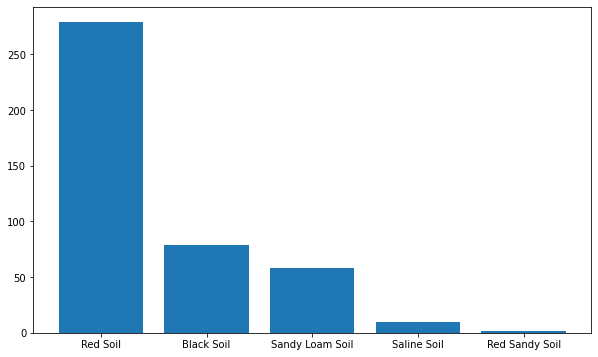

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Paddy/G.gram', 'Cashew', 'Banana', 'banana/coconut',
       'Maize/paddy', 'coconut', 'Coconut', 'coconut/banana',
       'Paddy/Maize', 'Banana/coconut', 'cashew', 'Chilli Papaya',
       'Maize', 'banana', 'maize', 'paddy', 'Paddy Maize', 'Maize/Horti',
       'Cotton/Maize', 'paddy  ', 'Paddy', 'Paddy Sugercane',
       'Paddy/Ragi', 'Paddy/G.nut'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy/G.gram       177
Paddy               50
Maize               38
Coconut             35
banana/coconut      34
Cashew              20
Banana/coconut      17
Banana              11
Maize/paddy          7
paddy                7
maize                5
Paddy/G.nut          5
Paddy Maize          4
banana               3
Paddy/Ragi           3
Cotton/Maize         3
Paddy/Maize          2
Paddy Sugercane      1
coconut              1
coconut/banana       1
Maize/Horti          1
paddy                1
Chilli Papaya        1
cashew               1
Name: Crop, dtype: int64

Paddy + GreenGram    177
Paddy                 67
Banana + Coconut      52
Maize                 47
Coconut               36
Cashew                21
Name: Crop, dtype: int64


<BarContainer object of 6 artists>

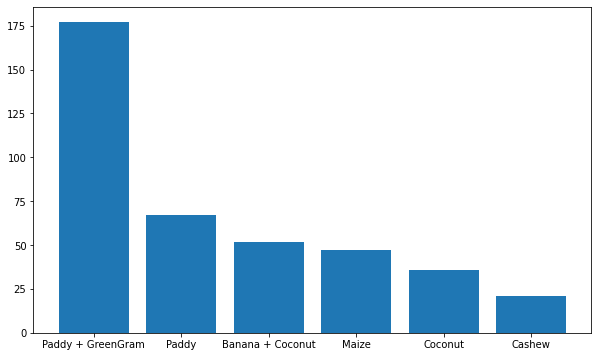

In [15]:
df['Crop'] = df['Crop'].replace(['Paddy/G.nut', 'Paddy/Ragi', 'Paddy Sugercane', 'paddy', 'paddy  '], 'Paddy')
df['Crop'] = df['Crop'].replace('Paddy/G.gram', 'Paddy + GreenGram')
df['Crop'] = df['Crop'].replace('cashew', 'Cashew')
df['Crop'] = df['Crop'].replace(['Maize/Horti', 'Cotton/Maize', 'maize'], 'Maize')
df['Crop'] = df['Crop'].replace(['Maize/paddy', 'Paddy/Maize', 'Paddy Maize'], 'Maize + Paddy')
df['Crop'] = df['Crop'].replace('banana', 'Banana')
df['Crop'] = df['Crop'].replace(['banana/coconut', 'coconut/banana', 'Banana/coconut'], 'Banana + Coconut')
df['Crop'] = df['Crop'].replace(['coconut', 'Coconut'], 'Coconut')
df = df[(df['Crop'] != 'Chilli Papaya') & (df['Crop'] != ' ') & (df['Crop'] != 'Banana') & (df['Crop'] != 'Maize + Paddy')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDWI
pH,1.000000,0.036144,-0.173142,0.147631,0.212099,0.088177,0.248197,0.004609,0.056296,0.388219,-0.699983,-0.374378,-0.355627,-0.187750
EC,0.036144,1.000000,0.294264,0.103024,0.281155,0.277983,0.345899,0.760315,0.079011,0.392242,-0.047530,0.174227,-0.070442,0.128707
OC,-0.173142,0.294264,1.000000,0.428003,0.485155,0.535371,0.427264,0.247478,0.505206,0.471484,0.384226,0.686953,0.236073,-0.007873
P,0.147631,0.103024,0.428003,1.000000,0.646969,0.158760,0.049023,0.068294,0.582799,0.225287,0.003291,0.053457,-0.047088,-0.187067
K,0.212099,0.281155,0.485155,0.646969,1.000000,0.335424,0.288572,0.191091,0.403726,0.426516,-0.102368,0.157180,-0.012947,-0.114711
Ca,0.088177,0.277983,0.535371,0.158760,0.335424,1.000000,0.853234,0.200946,0.197035,0.357904,0.143338,0.598291,0.133805,0.063287
Mg,0.248197,0.345899,0.427264,0.049023,0.288572,0.853234,1.000000,0.227618,0.053939,0.596317,-0.014557,0.511157,0.027572,0.021910
S,0.004609,0.760315,0.247478,0.068294,0.191091,0.200946,0.227618,1.000000,0.034358,0.418827,0.036341,0.165831,-0.080504,0.148228
Zn,0.056296,0.079011,0.505206,0.582799,0.403726,0.197035,0.053939,0.034358,1.000000,0.136258,0.099621,0.169182,0.158456,-0.289074
B,0.388219,0.392242,0.471484,0.225287,0.426516,0.357904,0.596317,0.418827,0.136258,1.000000,-0.146109,0.348940,-0.120227,-0.061820


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)


Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Cu']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'Fe', 'Mn', 'NDWI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC  ...  Red Soil  Saline Soil  Sandy Loam Soil
3041  6.12  0.77  0.96  ...         0            0                0

[1 rows x 12 columns]
3041    Paddy + GreenGram
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:7] = sc1.fit_transform(X[:, 0:7])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.67


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 72.33 %
Standard Deviation: 6.67 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state = 0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.68


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 66.67 %
Standard Deviation: 8.43 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state = 0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.75


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 75.67 %
Standard Deviation: 7.46 %


In [36]:
# pickle.dump(clf3, open('Srikakulam_model.pkl', 'wb'))
# pickle.dump(sc1, open('Srikakulam_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state = 0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 74.67 %
Standard Deviation: 6.18 %


# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.83
Testing Accuracy:  0.74


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 71.67 %
Standard Deviation: 6.19 %


# Catboost

In [46]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.1205770	total: 47.4ms	remaining: 4.69s
1:	learn: 0.9627727	total: 48.9ms	remaining: 2.4s
2:	learn: 0.8925714	total: 50ms	remaining: 1.62s
3:	learn: 0.8058860	total: 51ms	remaining: 1.22s
4:	learn: 0.7688253	total: 52ms	remaining: 987ms
5:	learn: 0.7177348	total: 53ms	remaining: 831ms
6:	learn: 0.7064800	total: 54ms	remaining: 718ms
7:	learn: 0.6904930	total: 55.5ms	remaining: 638ms
8:	learn: 0.6714281	total: 56.6ms	remaining: 572ms
9:	learn: 0.6602374	total: 57.5ms	remaining: 517ms
10:	learn: 0.6276067	total: 58.4ms	remaining: 473ms
11:	learn: 0.6089880	total: 59.3ms	remaining: 435ms
12:	learn: 0.5987828	total: 60.3ms	remaining: 403ms
13:	learn: 0.5867473	total: 61.2ms	remaining: 376ms
14:	learn: 0.5788716	total: 62.2ms	remaining: 353ms
15:	learn: 0.5596952	total: 63.2ms	remaining: 332ms
16:	learn: 0.5362954	total: 64.2ms	remaining: 313ms
17:	learn: 0.5234734	total: 65.1ms	remaining: 297ms
18:	learn: 0.5200800	total: 66.1ms	remaining: 282ms
19:	learn: 0.5013765	total: 67ms	

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.9809712846
bestIteration = 99

Training on fold [1/5]

bestTest = 0.9166457434
bestIteration = 99

Training on fold [2/5]

bestTest = 0.9246566031
bestIteration = 99

Training on fold [3/5]

bestTest = 0.974464909
bestIteration = 99

Training on fold [4/5]

bestTest = 0.9563573393
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
2:	learn: 1.6932546	total: 17.4ms	remaining: 5.78s
3:	learn: 1.6669737	total: 23.1ms	remaining: 5.75s
4:	learn: 1.6345535	total: 28.6ms	remaining: 5.69s
5:	learn: 1.6130539	total: 34ms	remaining: 5.63s
6:	learn: 1.5809849	total: 39.3ms	remaining: 5.58s
7:	learn: 1.5546143	total: 44.9ms	remaining: 5.57s
8:	learn: 1.5309321	total: 50.4ms	remaining: 5.55s
9:	learn: 1.5097540	total: 55.8ms	remaining: 5.52s
10:	learn: 1.4836562	total: 61.3ms	remaining: 5.51s
11:	learn: 1.4595060	total: 66.8ms	remaining: 5.5s
12:	learn: 1.4408456	total: 72.3ms	remaining: 5.49s
13:	learn: 1.4238816	total: 77.8ms	remaining: 5.48s
14:	learn: 1.4058595	total: 83.2ms	remaining: 5.46s
15:	learn: 1.3857571	total: 88.7ms	remaining: 5.46s
16:	learn: 1.3661675	total: 94.2ms	remaining: 5.44s
17:	learn: 1.3420121	total: 109ms	remaining: 5.93s
18:	learn: 1.3257088	total: 115ms	remaining: 5.96s
19:	learn: 1.3069185	total: 121ms	remaining: 5.95s
20:	learn: 1.2915103	total: